In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw07.ipynb")

## Homework 7: Random processes & linear models
# 52 pts, Due Friday Feb 25 at 11:59pm 

# **Helpful Resources:**# 

- [Getting help on a Jupyter Notebook](https://problemsolvingwithpython.com/02-Jupyter-Notebooks/02.07-Getting-Help-in-a-Jupyter-Notebook/)

- [Python Examples](https://nbviewer.jupyter.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/Python_101.ipynb): A reference for distinct Python commands (worth returning to throughout this course)

- [Inferential Thinking: Chapter 15, Prediction](https://inferentialthinking.com/chapters/15/Prediction.html)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import autograder_tools as at
%matplotlib inline

## Point Breakdown

| **Question #** | **Points**  |
| -------------- | :---------: |
| Question 0     | 4           |
| Question 1     | 35          |
| Question 2     | 43          |

## Question 0: Connecting with another student. (4 pts)

Chat with any other student about the assignment. Ask or try to answer any homework questions you each have. 

If you communicated with a homework partner(s) about the assignment, please write their names in Markdown Cell for credit below.

Logan Rower

<!-- END QUESTION -->

## Question 1: Estimating length changes in a northern pike population. (35 pts)
In 1989, the Minnesota Department of Natural Resourcers instituted a *slot limit* of 22-30 inches for fish in [Medicine Lake](https://en.wikipedia.org/wiki/Medicine_Lake_(Minnesota)), an ~ 460-acre lake in Beltrami County, MN. This means that all fish caught within this size interval had to be released. Using limited random samples from before and after the limit was imposed, try to estimate the effect of the slot limit on fish lengths. To do this, use `Pikedata.csv`, which contains length data from 73 fish caught in net collection traps in 1988 and 81 fish collected in 1993. From these limited samples, the bootstrap technique provides a means to estimate the expected distribution of mean length differences that would be obtained with wider sampling. 


### Question 1a (13 pts):
Make two histograms on the same subplot showing distribution of 1988 and 1993 lengths. Make the 1988 data a normal histogram and 1993 data with `histtype='step'`. Plot means of each distribution as downward facing triangles.

### Answer 1a

Text(0, 0.5, 'counts')

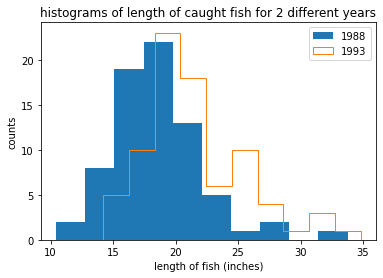

In [15]:
# Read in Pike Data dataframe...
df_pike = pd.read_csv('Pikedata.csv')
# Divide the dataframe into 1988-only and 1993-only data
length_88 = df_pike.loc[df_pike['year'] == 1988, 'length.inches']
length_93 = df_pike.loc[df_pike['year'] == 1993, 'length.inches']


# Setting up the axes for this problem...
fig=plt.figure()
ax1a=fig.add_subplot(111)

# Create your histograms here; 88 should be normal, but 93 should be 'step'
# Density should be false in this problem
# STARTER CODE (for autograding)
cts_88, bins_88, patches_88 = ax1a.hist(length_88, label='1988')
cts_93, bins_93, patches_93 = ax1a.hist(length_93, histtype='step', label='1993')

ax1a.set_title('histograms of length of caught fish for 2 different years')
ax1a.legend()
ax1a.set_xlabel('length of fish (inches)')
ax1a.set_ylabel('counts')







In [16]:
grader.check("q1a")

q1a results: All test cases passed!

### Question 1b (3 pts):
Assign the observed difference in mean lengths between 1988 and 1993 to `observed_mean_difference`

### Answer 1b:

In [20]:
observed_mean_difference= np.mean(length_93) - np.mean(length_88)
print(observed_mean_difference)

2.8977574835109046


In [21]:
grader.check("q1b")

q1b results: All test cases passed!

### Question 1c (6 pts):
Use a permutation test, with 1000 permutations, to calculate the distribution of mean differences expected under the null hypothesis that there was no difference between 1988 and 1993 fish lengths. Plot this null distribution as a histogram. 

### Answer 1c:

In [22]:

num_permutations= 1000

mean_diff_array = np.empty(num_permutations)
for z in range(num_permutations):
    permuted_data = np.random.permutation(np.concatenate([length_93, length_88]))
    permuted_93 = permuted_data[0:len(length_93)]
    permuted_88 = permuted_data[len(length_93):]
    mean_diff = np.mean(permuted_93) - np.mean(permuted_88)
    mean_diff_array[z] = mean_diff
    

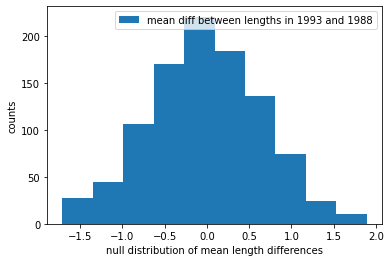

In [24]:
# Creating the axes for this problem...
fig=plt.figure()
ax1c=fig.add_subplot(111)

# Create your histogram (no density)
# Starter code
cts_diff, bins_diff, patches_diff = ax1c.hist(mean_diff_array, label='mean diff between lengths in 1993 and 1988')

...

...

# Finish the graph...
ax1c.set_xlabel('null distribution of mean length differences')
ax1c.set_ylabel('counts')
ax1c.legend()

In [25]:
grader.check("q1c")

q1c results: All test cases passed!

### Question 1d (3 pts): 
For what proportion of this null distribution is the mean length difference greater than observed?

### Answer 1d

In [26]:
proportion_exceeding_observed= len(mean_diff_array[mean_diff_array > observed_mean_difference])
print(proportion_exceeding_observed)

0


In [27]:
grader.check("q1d")

q1d results: All test cases passed!

### Question 1e (7 pts):
Use 1,000 random samples with replacement of the observed data to calculate the distribution of mean length differences expected with wider sampling of the population. Plot this distribution as a histogram.  Calculate the 95% confidence interval and plot this as a horizontal line. Save the lower and higher bounds of confidence interval to variable s`lower_bound` and `higher_bound`.

### Answer 1e

In [ ]:


...
    
    
    

# Create axes for this plot
fig=plt.figure()
ax1e=fig.add_subplot(111)

# Create a histogram of the bootstrap array
""" Starter code
cts_boot, bins_boot, patches_boot = ax1e.hist(...)
"""
...

conf_interval= ...

...

# Finish the plot...
...

# Set higher and lower bound variables
lower_bound= ...
higher_bound= ...

In [ ]:
grader.check("q1e")

### Question 1f (3 pts):
Did the slot limit cause a significant change in fish length? Provide a *short* answer, with reference to your tests above.

### Answer 1f

_Type your answer here, replacing this text._

<!-- END QUESTION -->

## Question 2: Old Faithful Redux (43 pts)
The [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient) is defined as the covariance of two variables divided by their standard deviation. The possible values of the correlation coefficient vary between -1 (absolute negative correlation) and 1 (absolute positive correlation).
In class, we learned that when paired data are converted to standard units (with mean subtracted and normalized by standard deviation), the correlation coefficient -- often abbreviated as **r** -- is the slope of the best fit line and is calculated as the mean of the point-by-point product of the data.

The slope in original units of the data is:<br>
**Slope = r  * (sd(y)/sd(x))**



We previously examined observations of the Old Faithful geyser, recording a series of paired eruption durations and waiting times until the next eruption. Here, we re-examine this data set to infer general properties of the geyser from the limited sample. <br>
Load in the data from `old_faithful.csv` and remake the scatter plot from HW 2, Question 1g. These data are suggestive of a linear association between eruption duration and waiting time.  

### Question 2a (4 pts):

Make a scatter plot of the Old Faithful data with eruptions on the horizontal axis and waiting on the vertical axis.

### Answer 2a

In [ ]:

fig=plt.figure()
ax2a=fig.add_subplot(111)


...


In [ ]:
grader.check("q2a")

### Question 2b (3 pts): 
Use the numpy `corr_coef` method to calculate the Pearson correlation coeffient and assign it to the variable `correlation`. *A reminder*: index one value of the 2x2 array returned by the `corr_coef` method.

### Answer 2b:

In [ ]:
correlation= ...

In [ ]:
grader.check("q2b")

### Question 2c (6 pts): 
Remake the scatter plot from above, adding a linear model of the data constructed from the correlation coefficient. Assign the slope of the fit line to the variable `slope` and y-intercept to variable `intercept`.

### Answer 2c

_Type your answer here, replacing this text._

In [ ]:
# Creating axes for this problem...
fig=plt.figure()
ax2c=fig.add_subplot(111)


slope= ...
intercept= ...

old_faithful_scatter = ...
#Added this line - expecting variable xvls created with linspace
xvls=np.linspace(1,6,20)
# Plot the x values and the y values.


...

...

In [ ]:
grader.check("q2c")

### Question 2ca: 
Based on this linear model, what would you predict the waiting time to be after an eruption of one minute?  After an eruption of 6 minutes?
Save your answers to `waiting_time_after_one_min_eruption`, `waiting_time_after_six_min_eruption`

### Answer 2ca:

In [ ]:
waiting_time_after_one_min_eruption= ...
waiting_time_after_six_min_eruption= ...
print(waiting_time_after_one_min_eruption)
print(waiting_time_after_six_min_eruption)

In [ ]:
grader.check("q2ca")

### Question 2d (9 pts):

How does this observed value of the correlation coefficient compare to the distributon of correlation coefficients expected by chance? Address this question by randomly shuffling the observed pairings 1,000 times. Make a histogram of  the distribution of correlation coefficients obtained via shuffling, and plot the observed correlation coefficient as a downward facing triangle.

### Answer 2d

In [ ]:


...
    
# Creating the axes for this problem
fig=plt.figure()
ax2d=fig.add_subplot(111)

# coeff_hist=ax2d.hist(...)
coeff_hist = ...

...

# Finish the graph
...

In [ ]:
grader.check("q2d")

### Question 2e (10 pts):
An alternative method of evaluating the significance of a correlation coefficient is to create a 95% confidence interval. To do this, bootstrap the observed data *preserving the original pairings* and repeatedly resample the observed data with replacement. Using 1,000 bootstraps, determine the 95% confidence interval for the correlation coefficient. Plot the distribution of expected correlation coefficients as a histogram and the 95% confidence interval as a horizontal line.

### Answer 2e

In [ ]:


    
    
# Setting up axes for this question...
fig=plt.figure()
ax2e=fig.add_subplot(111)

# boot_hist=ax2e.hist(...)

conf_interval= ...


# Finish the graph
...

In [ ]:
grader.check("q2e")

### Question 2f (11 pts):
The bootstrap can be used to estimate the underlying expected distribution of any statistical parameter. Use a bootstrap approach (1,000 samples) to estimate the proportion of eruptions lasting longer than 3 minutes.  Create an array called `proportion_percentiles` with the 1st, 50th, and 99th percentile proportions.

### Answer 2f

In [ ]:


    
    
    
# Creating the axes for this problem
fig=plt.figure()
ax2f=fig.add_subplot(111)

# minutes_hist=ax2f.hist(...)
minutes_hist = ...



...
s
# Finish the graph...
...

In [ ]:
grader.check("q2f")

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()